In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [4]:
try:
    df = pd.read_pickle('df.p')
    print('loaded pickled DF')
except:
    print('generating DF from MTA site')
    df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200822.txt')
    # 8/15 to 8/21
    df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200829.txt')
    #8/22 to 8/28
    df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200905.txt')
    #8/29 to 9/04
    df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200912.txt')
    #9/05 to 9/11
    
    #each df is one week (saturday to friday)
    df = pd.concat([df1, df2, df3, df4])
    pickle.dump(df, open('df.p','wb'))

In [ ]:
#df['DateTime'] = pd.to_datetime(df.DATE.astype(str) + " " + df.TIME.astype(str))

In [5]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,00:00:00,REGULAR,7444885,2531033
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,04:00:00,REGULAR,7444886,2531034
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,08:00:00,REGULAR,7444899,2531046
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,12:00:00,REGULAR,7444933,2531082
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,16:00:00,REGULAR,7445032,2531110


In [ ]:
df.dtypes

In [26]:
df.groupby(['STATION','DATE']).sum().head(12)

ENTRIES  \
STATION DATE                     
1 AV    08/15/2020  2771653720   
        08/16/2020  2771674520   
        08/17/2020  2767721030   
        08/18/2020  2771723848   
        08/19/2020  2771756198   
        08/20/2020  3681276669   
        08/21/2020  2400648140   
        08/22/2020  2771852795   
        08/23/2020  2771876020   
        08/24/2020  2771895638   
        08/25/2020  4612090979   
        08/26/2020  2771955458   

                    EXITS                                                                 
STATION DATE                                                                              
1 AV    08/15/2020                                         2821260825                     
        08/16/2020                                         2821290308                     
        08/17/2020                                         2798142810                     
        08/18/2020                                         2821364513                     
        08/19/2020                                         2821409240                     
        08/20/2020                                         3688923928                     
        08/21/2020                                         2428416579                     
        08/22/2020                                         2821538741                     
        08/23/2020                                         2821570241                     
        08/24/2020                                         2821605213                     
        08/25/2020                                         4674313564                     
        08/26/2020                                         2821684805

In [8]:
%matplotlib inline

In [28]:
station = df.groupby(['STATION','DATE']).sum()
#station = station.loc['59 ST']
station.head(10)

ENTRIES  \
STATION DATE                     
1 AV    08/15/2020  2771653720   
        08/16/2020  2771674520   
        08/17/2020  2767721030   
        08/18/2020  2771723848   
        08/19/2020  2771756198   
        08/20/2020  3681276669   
        08/21/2020  2400648140   
        08/22/2020  2771852795   
        08/23/2020  2771876020   
        08/24/2020  2771895638   

                    EXITS                                                                 
STATION DATE                                                                              
1 AV    08/15/2020                                         2821260825                     
        08/16/2020                                         2821290308                     
        08/17/2020                                         2798142810                     
        08/18/2020                                         2821364513                     
        08/19/2020                                         2821409240                     
        08/20/2020                                         3688923928                     
        08/21/2020                                         2428416579                     
        08/22/2020                                         2821538741                     
        08/23/2020                                         2821570241                     
        08/24/2020                                         2821605213

In [29]:
dates = list(station.loc['59 ST'].index)
entries = list(station.loc['59 ST']['ENTRIES'])

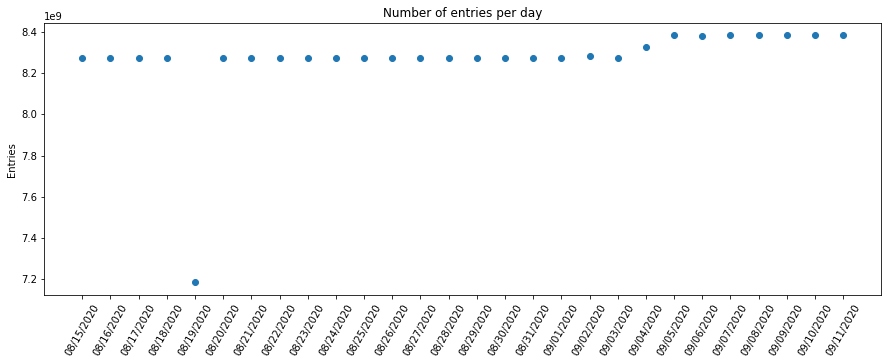

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=60)
billion = 1000000000
#ax.set(ylim=(1.37*billion, 1.45*billion))
plt.ylabel('Entries')
plt.title('Number of entries per day')
ax.scatter(dates,entries)
plt.show()